In [1]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

# Importing dataset
df=pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')
print("Shape of data=>",df.shape)

Shape of data=> (5000, 24)


In [2]:
df.head(2)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...


In [3]:
df = df[['name','reviews.doRecommend','reviews.numHelpful','reviews.text','reviews.title']]

In [4]:
df.head()

,name,reviews.doRecommend,reviews.numHelpful,reviews.text,reviews.title
0,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",False,0,I thought it would be as big as small paper bu...,Too small
1,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",True,0,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach
2,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",True,0,Didnt know how much i'd use a kindle so went f...,Great for the price
3,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",True,3,I am 100 happy with my purchase. I caught it o...,A Great Buy
4,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",True,0,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids


In [5]:
df.isnull().sum()

name                    0
reviews.doRecommend     0
reviews.numHelpful      0
reviews.text            0
reviews.title          13
dtype: int64

In [6]:
df.dropna(inplace=True)
df.isnull().sum()

name                   0
reviews.doRecommend    0
reviews.numHelpful     0
reviews.text           0
reviews.title          0
dtype: int64

In [7]:
df=df.groupby('name').filter(lambda x:len(x)>500).reset_index(drop=True)
print('Number of products=>',len(df['name'].unique()))

Number of products=> 4


In [8]:
df['reviews.doRecommend']=df['reviews.doRecommend'].astype(int)
df['reviews.numHelpful']=df['reviews.numHelpful'].astype(int)

In [9]:
df['name'].unique()

array(['Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7" Screen',
       'Amazon - Echo Plus w/ Built-In Hub - Silver',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case',
       'All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta'],
      dtype=object)

In [10]:
for index,text in enumerate(df['reviews.text'][35:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 I was jealous when our son showed us his Amazon Show and some of the things it was capable of doing. Since AOL eliminated Instant Messaging, my wife and I were less able to communicate because our offices are on separate floors. So we got two Shows and two Spots and now not only can intercom easily but use Alexa for music and many other things. We will probably start using some smart home devices which Alexa can also control. It's a fun device which seems to be getting better all the time.
Review 2:
 We use this as a monitor for the amazon cloud camera! Works great we tell it to show us the camera ,and boom, there‚Äôs the video feed. Super easy to link our echo plus and the echo dot with the show!!
Review 3:
 We use echo almost every day. It is fun to ask questions. The music is great. We check the weather and listen to NPRnews
Review 4:
 Love playing music and talking to Alexa and looking at my camera three the screen
Review 5:
 I love the Echo Show and this is the 3rd one 

In [11]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['reviews.text']=df['reviews.text'].apply(lambda x:expand_contractions(x))

In [12]:
# Lowercase the text 

df['cleaned']=df['reviews.text'].apply(lambda x: x.lower())

In [13]:
#Remove Digits


df['cleaned']=df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [14]:
#Remove Punctuations
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [15]:
# Removing extra spaces
df['cleaned']=df['cleaned'].apply(lambda x: re.sub(' +',' ',x))

In [16]:
for index,text in enumerate(df['cleaned'][35:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 i was jealous when our son showed us his amazon show and some of the things it was capable of doing since aol eliminated instant messaging my wife and i were less able to communicate because our offices are on separate floors so we got two shows and two spots and now not only can intercom easily but use alexa for music and many other things we will probably start using some smart home devices which alexa can also control it is a fun device which seems to be getting better all the time
Review 2:
 we use this as a monitor for the amazon cloud camera works great we tell it to show us the camera and boom there‚äôs the video feed super easy to link our echo plus and the echo dot with the show
Review 3:
 we use echo almost every day it is fun to ask questions the music is great we check the weather and listen to nprnews
Review 4:
 love playing music and talking to alexa and looking at my camera three the screen
Review 5:
 i love the echo show and this is the one i have purchased t

# # EDA

In [17]:
# pip install spacy --user

In [18]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['lemmatized']=df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [19]:
df_grouped=df[['name','lemmatized']].groupby(by='name').agg(lambda x:' '.join(x))
df_grouped.head()

,lemmatized
name,
"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",buy replace old kindle keypad experimental int...
Amazon - Echo Plus w/ Built-In Hub - Silver,works great turn ha tv light alexa app special...
"Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7"" Screen",great gift easy setup coexist iot device alexa...
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case",good product young child play break daughter l...


In [22]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(3)

,abc,ability,abke,able,absent,absolute,absolutely,absorb,abuse,ac,...,äú,äúalexa,äúbest,äúdroppe,äúshow,äúskills,äústar,äúthing,äúthings,ôºå
name,,,,,,,,,,,,,,,,,,,,,
"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",0,10,0,21,0,1,7,0,1,0,...,0,0,0,0,0,0,0,0,0,1
Amazon - Echo Plus w/ Built-In Hub - Silver,0,6,0,31,0,0,12,0,0,0,...,1,2,0,0,0,0,0,0,1,0
"Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7"" Screen",0,13,0,64,1,1,10,0,0,1,...,1,3,1,1,1,1,2,1,0,0


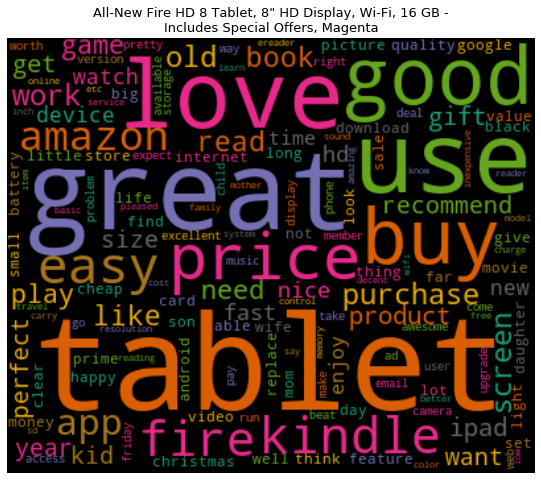

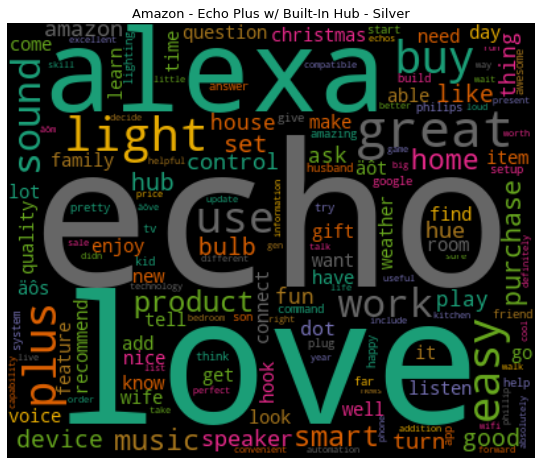

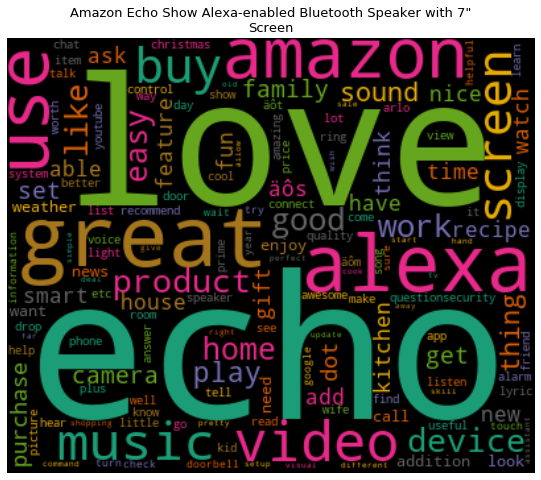

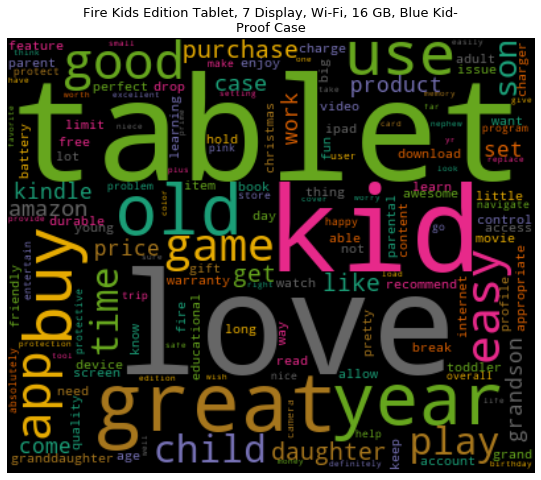

In [23]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)

In [24]:
from textblob import TextBlob
df['polarity']=df['lemmatized'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [25]:
print("3 Random Reviews with Highest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=False)[:3].index]['reviews.text']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Highest Polarity:
Review 1:
 If you are looking for an entry level tablet, this is it.The Kindle fire HD is perfect for kids!
Review 2:
 No issues perfect works as advertised........................
Review 3:
 I saw this product used by friends and was so impressed, I bought one for my husband for Christmas. .


In [26]:
print("3 Random Reviews with Lowest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=True)[:3].index]['reviews.text']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Lowest Polarity:
Review 1:
 I am disappointed that it does not have a mirror display mode.
Review 2:
 I had to return my device due to WIFI signal dropping, maybe I just had a bad unit.
Review 3:
 I got this because it is almost impossible to break


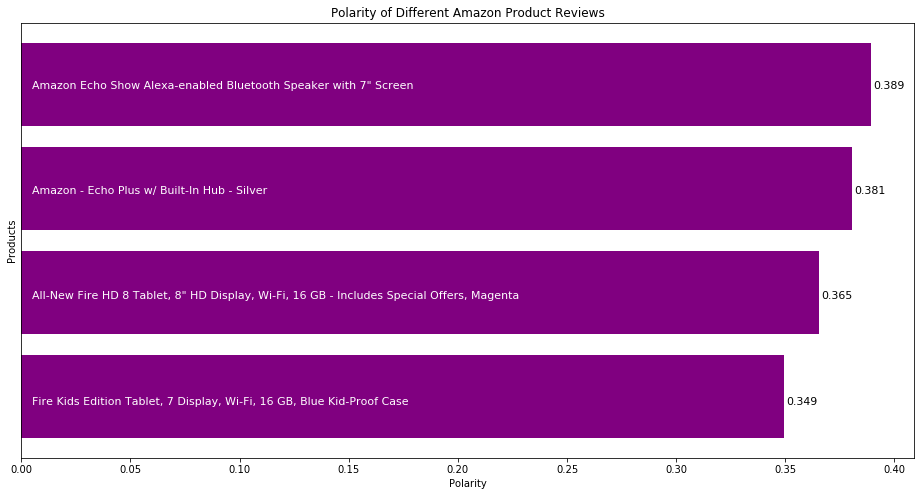

In [27]:
product_polarity_sorted=pd.DataFrame(df.groupby('name')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Products')
plt.title('Polarity of Different Amazon Product Reviews')
polarity_graph=plt.barh(np.arange(len(product_polarity_sorted.index)),product_polarity_sorted['polarity'],color='purple',)

# Writing product names on bar
for bar,product in zip(polarity_graph,product_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=11,color='white')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,product_polarity_sorted['polarity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()


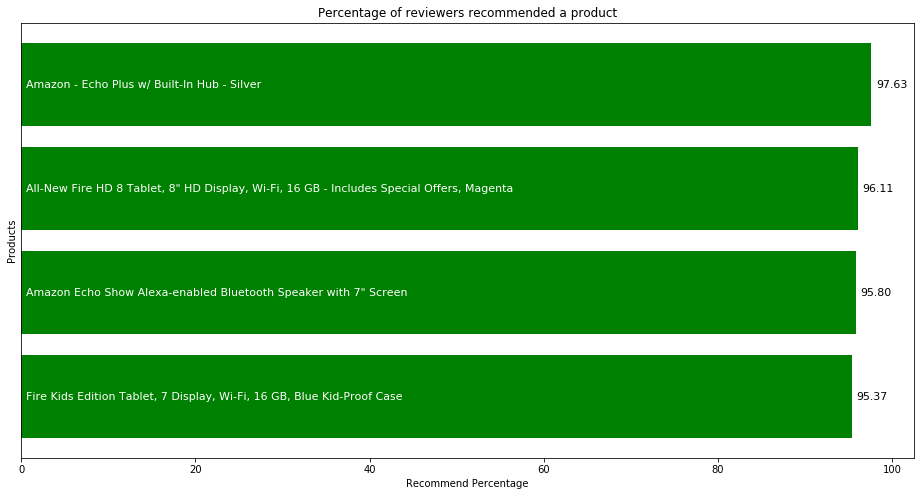

In [28]:
recommend_percentage=pd.DataFrame(((df.groupby('name')['reviews.doRecommend'].sum()*100)/df.groupby('name')['reviews.doRecommend'].count()).sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Recommend Percentage')
plt.ylabel('Products')
plt.title('Percentage of reviewers recommended a product')
recommend_graph=plt.barh(np.arange(len(recommend_percentage.index)),recommend_percentage['reviews.doRecommend'],color='green')

# Writing product names on bar
for bar,product in zip(recommend_graph,recommend_percentage.index):
  plt.text(0.5,bar.get_y()+0.4,'{}'.format(product),va='center',fontsize=11,color='white')

# Writing recommendation percentage on graph
for bar,percentage in zip(recommend_graph,recommend_percentage['reviews.doRecommend']):
  plt.text(bar.get_width()+0.5,bar.get_y()+0.4,'%.2f'%percentage,va='center',fontsize=11,color='black')

plt.yticks([])
plt.show()


In [30]:
import textstat
df['dale_chall_score']=df['reviews.text'].apply(lambda x: textstat.dale_chall_readability_score(x))
df['flesh_reading_ease']=df['reviews.text'].apply(lambda x: textstat.flesch_reading_ease(x))
df['gunning_fog']=df['reviews.text'].apply(lambda x: textstat.gunning_fog(x))

print('Dale Chall Score of upvoted reviews=>',df[df['reviews.numHelpful']>1]['dale_chall_score'].mean())
print('Dale Chall Score of not upvoted reviews=>',df[df['reviews.numHelpful']<=1]['dale_chall_score'].mean())

print('Flesch Reading Score of upvoted reviews=>',df[df['reviews.numHelpful']>1]['flesh_reading_ease'].mean())
print('Flesch Reading Score of not upvoted reviews=>',df[df['reviews.numHelpful']<=1]['flesh_reading_ease'].mean())

print('Gunning Fog Index of upvoted reviews=>',df[df['reviews.numHelpful']>1]['gunning_fog'].mean())
print('Gunning Fog Index of not upvoted reviews=>',df[df['reviews.numHelpful']<=1]['gunning_fog'].mean())

Dale Chall Score of upvoted reviews=> 6.086129032258066
Dale Chall Score of not upvoted reviews=> 5.666487272727282
Flesch Reading Score of upvoted reviews=> 74.64870967741936
Flesch Reading Score of not upvoted reviews=> 85.21494545454549
Gunning Fog Index of upvoted reviews=> 11.011935483870968
Gunning Fog Index of not upvoted reviews=> 6.878920000000013


In [31]:
df['text_standard']=df['reviews.text'].apply(lambda x: textstat.text_standard(x))

print('Text Standard of upvoted reviews=>',df[df['reviews.numHelpful']>1]['text_standard'].mode())
print('Text Standard of not upvoted reviews=>',df[df['reviews.numHelpful']<=1]['text_standard'].mode())


Text Standard of upvoted reviews=> 0    6th and 7th grade
dtype: object
Text Standard of not upvoted reviews=> 0    5th and 6th grade
dtype: object


In [32]:
df['reading_time']=df['reviews.text'].apply(lambda x: textstat.reading_time(x))

print('Reading Time of upvoted reviews=>',df[df['reviews.numHelpful']>1]['reading_time'].mean())
print('Reading Time of not upvoted reviews=>',df[df['reviews.numHelpful']<=1]['reading_time'].mean())


Reading Time of upvoted reviews=> 5.623225806451613
Reading Time of not upvoted reviews=> 1.8143563636363602


# Review

# '''
1. Customers love products from Amazon. They find them a great purchase and easy to use
2. Amazon needs to work on the Fire Kids Edition Tablet because it has the most negative reviews. It is also the least recommended product
3. The majority of reviews are written in simple English and are easily understandable by anyone who has 5th or 6th grade of school
4. The reading time of helpful reviews is twice that of non-helpful reviews which means people find longer reviews helpful
'''